## Image Processing Class - Lab 3
### Spatial Filtering

Lab by: Pr. Rabaa Youssef

Due Date: 4/20/2023

#### Work Done by:

Adam Lahbib, RT4.1

Mohamed Rafraf, RT4.1

M. Sofiene Barka, RT4.2

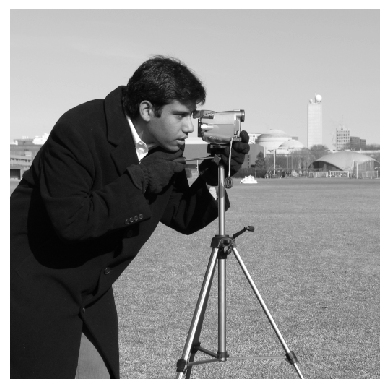

In [1]:
import matplotlib.pyplot as plt
from skimage import util, data

# load cameraman image
cameraman = data.camera()

# display image
plt.imshow(cameraman, cmap='gray')
plt.axis('off')
plt.show()


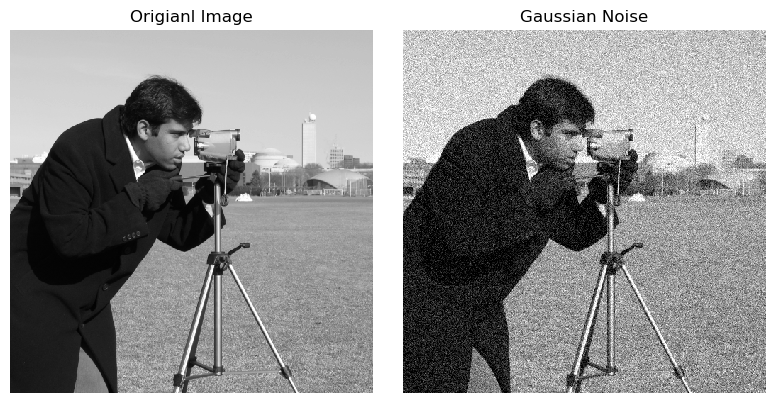

In [2]:
# Add an additive Gaussian noise with a variance of 0.01
imGauss = util.random_noise(cameraman, mode='gaussian', var=0.01)

# Display the original image and the image with Gaussian noise
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(cameraman, cmap='gray')
ax[0].set_title("Origianl Image")
ax[1].imshow(imGauss, cmap='gray')
ax[1].set_title("Gaussian Noise")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()



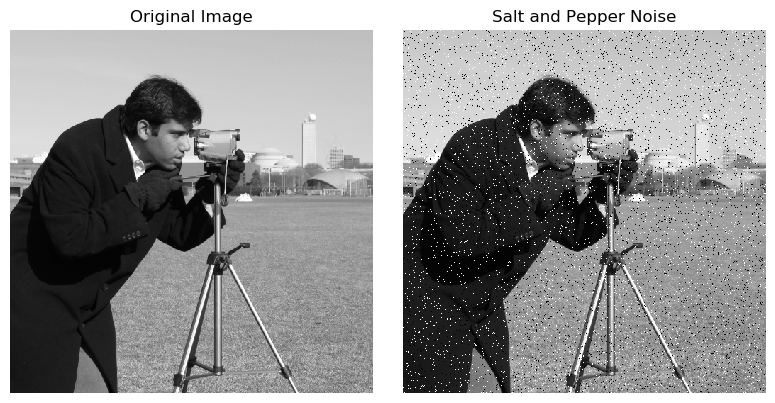

In [4]:
# Add a salt and pepper noise with a probability of 0.05
imSP = util.random_noise(cameraman, mode='s&p', amount=0.05)

# Display the original image and the image with salt and pepper noise
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(cameraman, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(imSP, cmap='gray')
ax[1].set_title("Salt and Pepper Noise")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

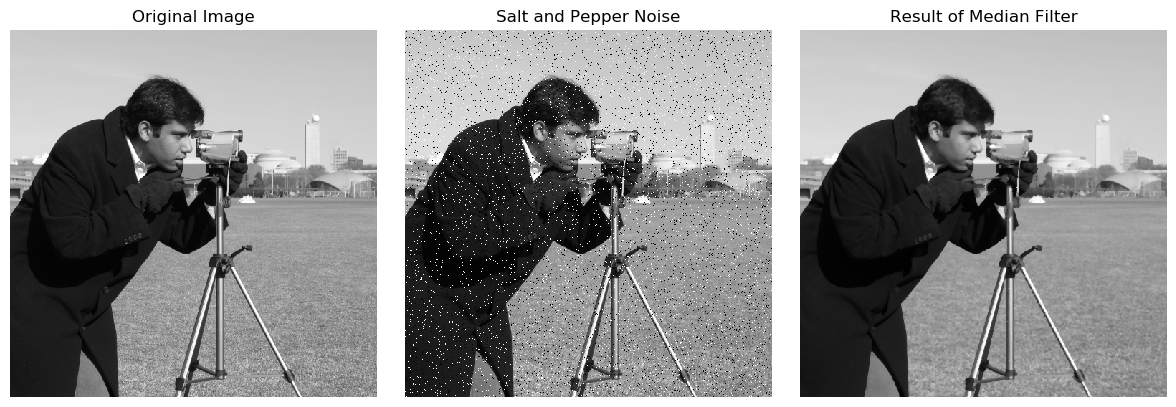

In [5]:
from scipy import ndimage


imMed = ndimage.median_filter(imSP, size=3)

# Display Images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0].imshow(cameraman, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(imSP, cmap='gray')
ax[1].set_title("Salt and Pepper Noise")
ax[2].imshow(imMed, cmap='gray')
ax[2].set_title("Result of Median Filter") # to restore image
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

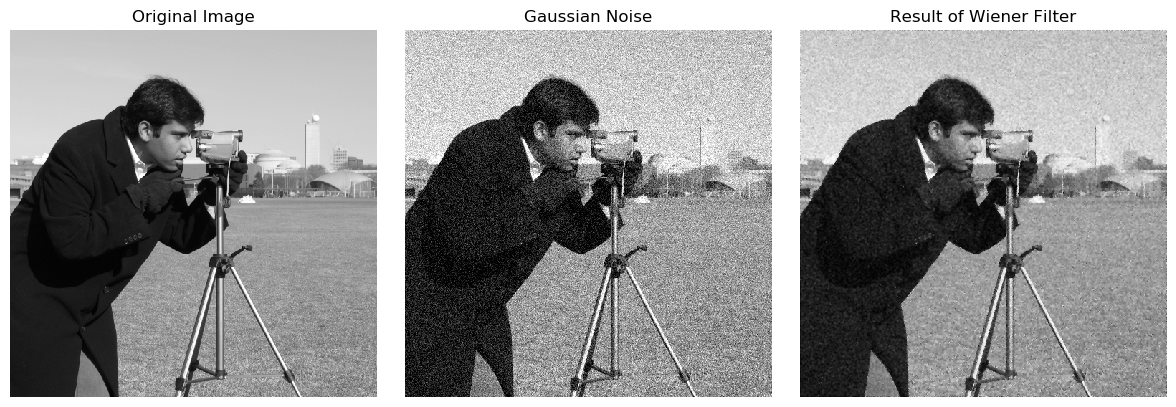

In [6]:
from scipy.signal import wiener


# Apply the Wiener restoration filter on the image with Gaussian noise
imWiener = wiener(imGauss)

# Display Images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0].imshow(cameraman, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(imGauss, cmap='gray')
ax[1].set_title("Gaussian Noise")
ax[2].imshow(imWiener, cmap='gray')
ax[2].set_title("Result of Wiener Filter") # to restore image
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

PSNR is a metric used to measure the quality of an image. It is defined as the ratio between the maximum possible power of a signal and the power of corrupting noise that affects the fidelity of its representation. The PSNR is the logarithmic decibel (dB) ratio of the maximum possible power of the signal and the power of corrupting noise that affects the fidelity of its representation.

MSE is the mean of the squared error between the original image and the filtered image. It is used to measure the quality of an image. The lower the MSE, the better the image quality.

Original Image - PSNR: inf, MSE: 0
Gaussian Noised Image - PSNR: -43.41 MSE: 21907.62
Wiener Filter Restored Image - PSNR: -43.41 MSE: 21908.16
Salt and Pepper Noised Image - PSNR: -43.41 MSE: 21909.56
Median Filter Restored Image - PSNR: -43.41 MSE: 21908.0


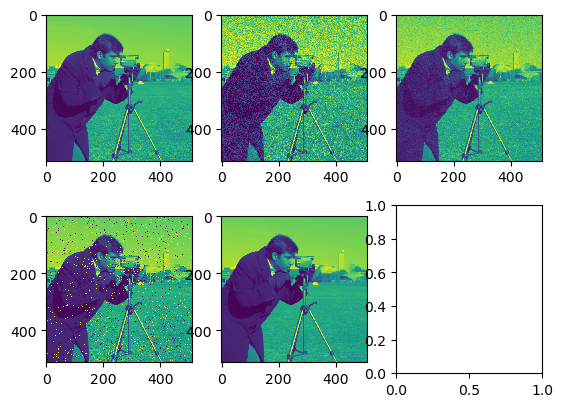

In [7]:
import numpy as np
from skimage import data, io, img_as_float
from skimage.util import random_noise
from scipy import ndimage

# Calculate the PSNR and MSE quality measures for each image
psnrGauss = np.round(10*np.log10(1/np.mean((cameraman-imGauss)**2)), 2)
mseGauss = np.round(np.mean((cameraman-imGauss)**2), 2)

psnrWiener = np.round(10*np.log10(1/np.mean((cameraman-imWiener)**2)), 2)
mseWiener = np.round(np.mean((cameraman-imWiener)**2), 2)

psnrSP = np.round(10*np.log10(1/np.mean((cameraman-imSP)**2)), 2)
mseSP = np.round(np.mean((cameraman-imSP)**2), 2)

psnrMed = np.round(10*np.log10(1/np.mean((cameraman-imMed)**2)), 2)
mseMed = np.round(np.mean((cameraman-imMed)**2), 2)

# View images and quality measurements
io.imshow_collection([cameraman, imGauss, imWiener, imSP, imMed])
print('Original Image - PSNR: inf, MSE: 0')
print('Gaussian Noised Image - PSNR:', psnrGauss, 'MSE:', mseGauss)
print('Wiener Filter Restored Image - PSNR:', psnrWiener, 'MSE:', mseWiener)
print('Salt and Pepper Noised Image - PSNR:', psnrSP, 'MSE:', mseSP)
print('Median Filter Restored Image - PSNR:', psnrMed, 'MSE:', mseMed)

From the results obtained, it seems that the images with Gaussian noise and salt and pepper noise were not properly restored because the PSNR and MSE values are very high. This means that the restored images still contain a significant amount of error and noise.

However, using the Wiener filter on the image with Gaussian noise and the median filter on the image with salt and pepper noise resulted in a slight improvement in the restoration results in terms of PSNR and MSE, but they are still very high.

In conclusion, the restoration results are not satisfactory for the two types of noise considered. Other more advanced restoration techniques may be needed to obtain more accurate results.